<a href="https://colab.research.google.com/github/Potdooshami/Potdooshami.github.io/blob/main/4%EA%B8%B0_3%EC%A3%BC%EC%B0%A8_MLP%EC%8B%A4%EC%8A%B5_251101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from PIL import Image # 이미지 처리를 위해 PIL(Pillow) 라이브러리 사용
# 필요 라이브러리
from google.colab import output
from IPython.display import display, Javascript
from base64 import b64decode
from PIL import Image
import numpy as np
import io
import IPython

In [ ]:
!pip install Pillow

# Activation Function
### $σ(x) = \frac{1}{1 + e^{-x}}$

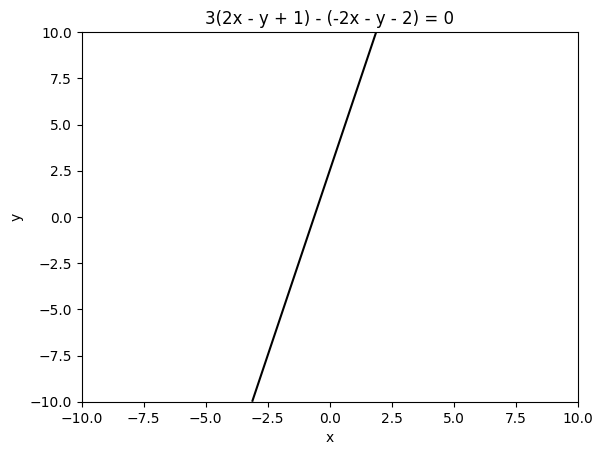

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid 생성
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

# 식 정의: f(x, y) = 3(2x - y + 1) + -1(-2x - y - 2)
Z = 3*(2*X - Y + 1) - (-2*X - Y - 2)

plt.contour(X, Y, Z, levels=[0], colors='black')  # level 0 → f(x, y) = 0
plt.title('3(2x - y + 1) - (-2x - y - 2) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
# Grid 생성
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)

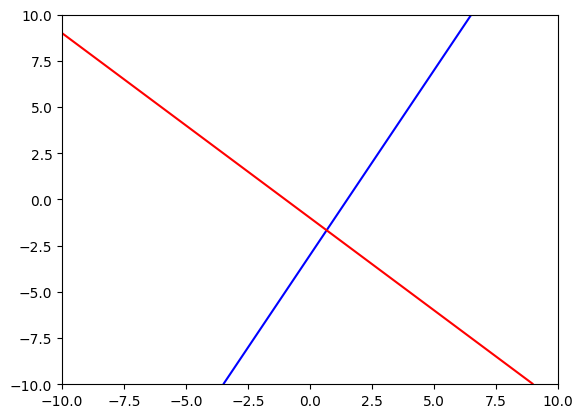

In [ ]:
ax = -2
ay = 1
ac = 3

bx = -2
by = -2
bc = -2

Za = ax * X + ay * Y + ac
Zb = bx * X + by * Y + bc

plt.contour(X, Y, Za, levels=[0], colors='blue')  # level 0 → f(x, y) = 0
plt.contour(X, Y, Zb, levels=[0], colors='red')
plt.show()

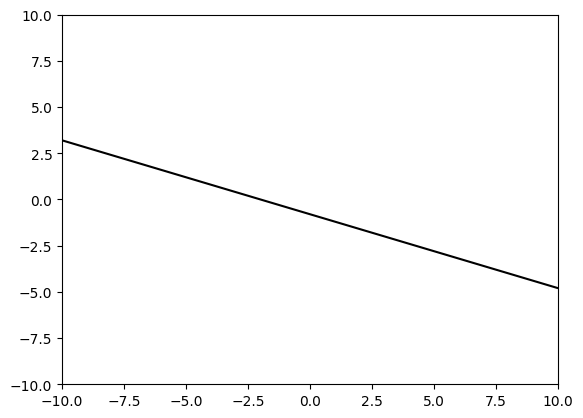

In [ ]:
Zc = -1 * Za + 2 * Zb + 3

plt.contour(X, Y, Zc, levels=[0], colors='black')
plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

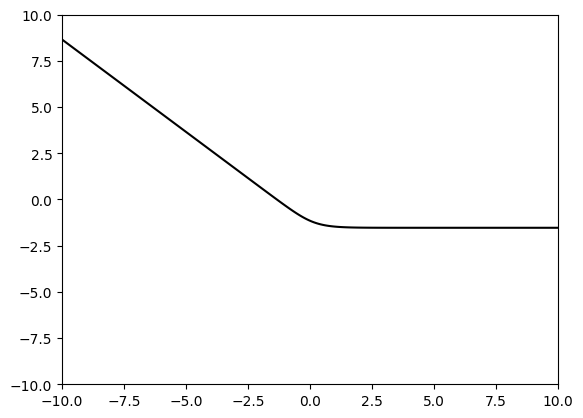

In [ ]:
Zd = -2 * sigmoid(Za) + 3 * sigmoid(Zb)

plt.contour(X, Y, Zd, levels=[0], colors='black')
plt.show()

# After sigmoid

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

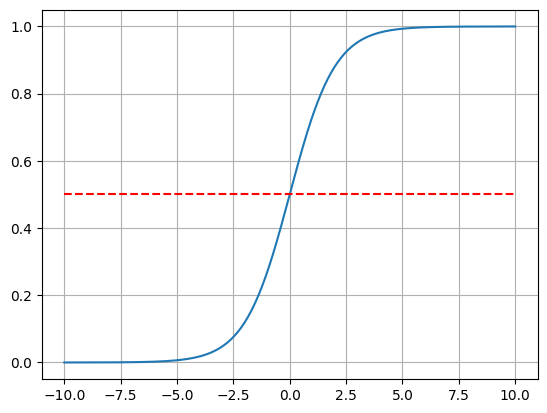

In [ ]:
x = np.linspace(-10, 10, 400)
y = sigmoid(x)
y0 = 0.5
plt.plot(x, y)
plt.plot(x, y0 * np.ones(len(x)), 'r--')
plt.grid(True)
plt.show()

In [ ]:
a = -2
b = 0
c = 3

print(sigmoid(a))
print(sigmoid(b))
print(sigmoid(c))

0.11920292202211755
0.5
0.9525741268224334


#  Softmax
### $a = \frac{e^{y_i}}{∑e^{y_j}}$

In [ ]:
outputs = np.array([-2, 0.5, -1.5, 3, 2.5, 1, 0.7])

In [ ]:
print("단순 분수 형태")
print(outputs/np.sum(outputs))

단순 분수 형태
[-0.47619048  0.11904762 -0.35714286  0.71428571  0.5952381   0.23809524
  0.16666667]


In [ ]:
def softmax(X):
  return np.exp(X) / np.sum(np.exp(X))

In [ ]:
print("Softmax")
print(softmax(outputs))

Softmax
[0.00346949 0.04226704 0.00572022 0.51491802 0.31231356 0.06968658
 0.05162509]


# MNIST & CIFAR-10

### MNIST 데이터셋 로드

In [ ]:
# MNIST 데이터셋 로드 (OpenML에서 가져오기)
# 처음 로드 시 시간이 다소 소요될 수 있습니다.
print("MNIST 데이터셋 로드 중...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
print("로드 완료.")

# 데이터와 레이블 분리
mnist_data = mnist.data
mnist_labels = mnist.target.astype(np.uint8) # 레이블을 정수형으로 변환

MNIST 데이터셋 로드 중...
로드 완료.


### MNIST 데이터셋 시각화

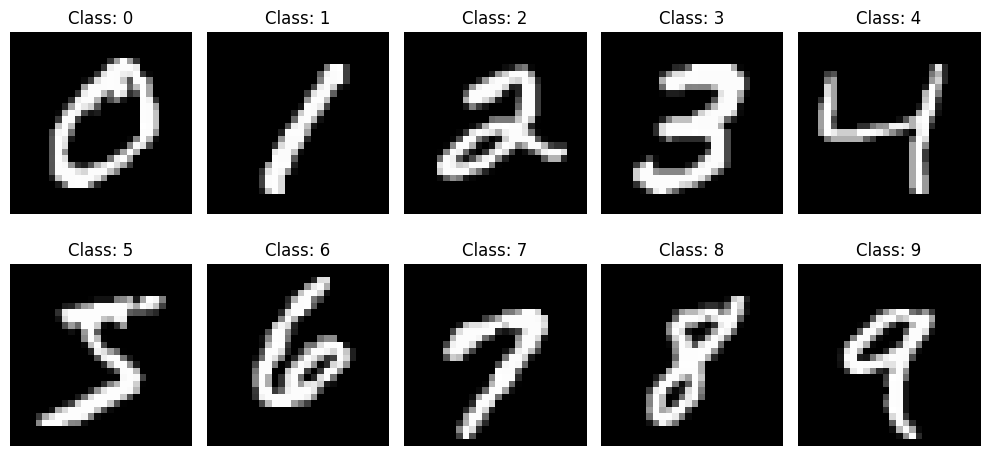

In [ ]:
# MNIST 클래스 이름 (0부터 9까지)
mnist_class_names = [str(i) for i in range(10)]

# 각 클래스별 이미지 하나씩 보여주기
plt.figure(figsize=(10, 5))
for i in range(10):
    # 해당 클래스의 인덱스 찾기
    class_indices = np.where(mnist_labels == i)[0]
    if len(class_indices) > 0:
        # 첫 번째 이미지 인덱스 선택
        img_index = class_indices[0]

        # 1차원 데이터를 28x28 이미지로 재구성
        img = mnist_data[img_index].reshape(28, 28)

        plt.subplot(2, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Class: {mnist_class_names[i]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

# MLP 구조 구현

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### MNIST 데이터 전처리 (이해할 필요 없음. 그냥 실행만 할 것.)

In [ ]:
# MNIST 데이터셋 로드 (OpenML에서 가져오기)
print("MNIST 데이터셋 로드 중...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
print("로드 완료.")

# 데이터와 레이블 분리
X, y = mnist.data, mnist.target.astype(np.uint8)

# 데이터를 0-1 사이로 스케일링 (픽셀 값 0~255를 255로 나눔)
X = X / 255.0

# 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"훈련 데이터 개수: {len(X_train)}")
print(f"테스트 데이터 개수: {len(X_test)}")

MNIST 데이터셋 로드 중...
로드 완료.
학습 데이터 형태: (56000, 784)
테스트 데이터 형태: (14000, 784)


In [ ]:
# 데이터 스케일링 (StandardScaler 사용)
# MinMaxScaler를 사용할 수도 있습니다. 여기서는 StandardScaler를 사용합니다.
# 이미 0-1 사이로 스케일링했지만, MLP에 더 적합하도록 평균 0, 표준편차 1로 다시 스케일링합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"학습 데이터 형태: {X_train_scaled.shape}")
print(f"테스트 데이터 형태: {X_test_scaled.shape}")

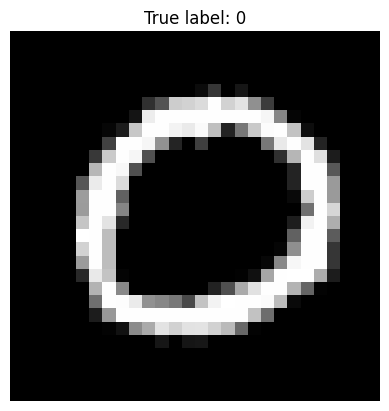

In [ ]:
idx = 3
img = X_train[idx].reshape(28, 28)  # 정규화 전 이미지로 보기
plt.imshow(img, cmap='gray')
plt.title(f"True label: {y_train[idx]}")
plt.axis('off')
plt.show()

### MLP 모델 정의

In [ ]:
from sklearn.metrics import accuracy_score

def train_mlp(hidden_size=(100,), lr=0.1, num_iter=30, verbose=True):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_size,
                        learning_rate_init=lr,
                        max_iter=num_iter,
                        activation='logistic',
                        solver='sgd',
                        random_state=42,
                        verbose=verbose)

    print("MLP 모델 학습 중...")
    mlp.fit(X_train_scaled, y_train)
    print("학습 완료.")

    # 테스트 정확도 평가
    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"테스트 정확도: {acc:.4f}")

    return mlp

In [ ]:
hidden_size = (100, 50, ) # (100, 50, )
lr = 0.0001
num_iter = 10

mlp = train_mlp(hidden_size, 1, 30)


MLP 모델 학습 중...
Iteration 1, loss = 0.40379239
Iteration 2, loss = 0.14368023
Iteration 3, loss = 0.10754757
Iteration 4, loss = 0.08565496
Iteration 5, loss = 0.06806216
Iteration 6, loss = 0.05841052
Iteration 7, loss = 0.04770074
Iteration 8, loss = 0.04376464
Iteration 9, loss = 0.03925229
Iteration 10, loss = 0.03265447
Iteration 11, loss = 0.03342760
Iteration 12, loss = 0.03044546
Iteration 13, loss = 0.02920858
Iteration 14, loss = 0.02658988
Iteration 15, loss = 0.02740102
Iteration 16, loss = 0.02225872
Iteration 17, loss = 0.02446022
Iteration 18, loss = 0.02446873
Iteration 19, loss = 0.02411652
Iteration 20, loss = 0.02219963
Iteration 21, loss = 0.02444565
Iteration 22, loss = 0.01993374
Iteration 23, loss = 0.02058347
Iteration 24, loss = 0.01926329
Iteration 25, loss = 0.01802268
Iteration 26, loss = 0.01798236
Iteration 27, loss = 0.01787934
Iteration 28, loss = 0.01888438
Iteration 29, loss = 0.01927388
Iteration 30, loss = 0.02063628
학습 완료.
테스트 정확도: 0.9601


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


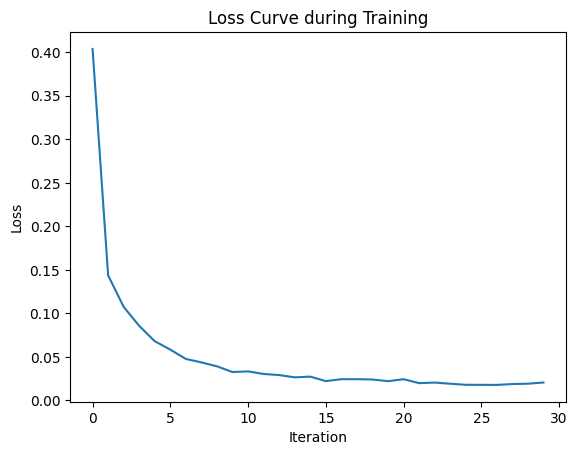

In [ ]:
# 모델 학습 후
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve during Training")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

### 캔버스 코드 정리 (볼 필요 없음)

### 내가 그린 숫자 평가해보기

In [ ]:
global_state = {}

def show_canvas_image(img):
    """
    그림 보여주기
    """
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Canvas Input")
    plt.show()

def set_prediction_output(text):
    js = f"""
    <script>
    document.getElementById('prediction-output').innerText = "{text}";
    </script>
    """
    display(HTML(js))

def preprocess_canvas_image(image):
    """
    Canvas 이미지 → 28×28 크기로 단순 변환 (MNIST 모델 입력용)
    중심이동, crop, 패딩 없이 가장 간단한 방식
    """
    img = image.resize((28, 28), Image.LANCZOS)  # PIL Image 그대로 resize
    img_np = np.array(img).astype(np.float32) / 255.0  # 정규화
    return img_np.reshape(1, -1)


def draw_canvas(model, scaler):
    global global_state
    global_state['model'] = model
    global_state['scaler'] = scaler

    def get_image(data):
        header, base64_data = data.split(',', 1)
        binary = b64decode(base64_data)
        img = Image.open(io.BytesIO(binary)).convert('L')
        global_state['input_canvas'] = img
        img_np = preprocess_canvas_image(img)
        global_state['input_canvas_pre'] = img_np

        img_np = scaler.transform(img_np)

        pred = model.predict(img_np)
        global_state['last_pred'] = pred[0]
        set_prediction_output(f"Predicted class: {pred[0]}")

    output.register_callback('notebook.get_image', get_image)

    display(Javascript('''
    (() => {
        ['canvas', 'predict-btn', 'erase-btn', 'prediction-output'].forEach(id => {
            const el = document.getElementById(id);
            if (el) el.remove();
        });

        const canvas = document.createElement('canvas');
        canvas.width = 280;
        canvas.height = 280;
        canvas.style.border = '2px solid black';
        canvas.id = 'canvas';
        document.body.appendChild(canvas);

        const ctx = canvas.getContext('2d');
        ctx.lineWidth = 15;
        ctx.lineCap = 'round';
        ctx.strokeStyle = 'white';

        let drawing = false;
        canvas.onmousedown = (e) => {
            drawing = true;
            ctx.beginPath();
            ctx.moveTo(e.offsetX, e.offsetY);
        };
        canvas.onmousemove = (e) => {
            if (drawing) {
                ctx.lineTo(e.offsetX, e.offsetY);
                ctx.stroke();
            }
        };
        canvas.onmouseup = () => drawing = false;
        canvas.onmouseout = () => drawing = false;

        const outputDiv = document.createElement('div');
        outputDiv.id = 'prediction-output';
        outputDiv.style.marginTop = '10px';
        outputDiv.innerText = '← Prediction will appear here';
        document.body.appendChild(outputDiv);

        const btnBox = document.createElement('div');
        btnBox.style.marginTop = '10px';

        const predictBtn = document.createElement('button');
        predictBtn.textContent = 'Predict';
        predictBtn.id = 'predict-btn';
        predictBtn.style.marginRight = '5px';
        btnBox.appendChild(predictBtn);

        predictBtn.onclick = () => {
            const data = canvas.toDataURL('image/png');
            google.colab.kernel.invokeFunction('notebook.get_image', [data], {});
        };

        const eraseBtn = document.createElement('button');
        eraseBtn.textContent = 'Erase';
        eraseBtn.id = 'erase-btn';
        btnBox.appendChild(eraseBtn);

        eraseBtn.onclick = () => {
            ctx.clearRect(0, 0, canvas.width, canvas.height);
            document.getElementById('prediction-output').innerText = '← Canvas cleared';
        };

        document.body.appendChild(btnBox);
    })()
    '''))

### 실습

In [ ]:
draw_canvas(mlp, scaler)  # 손그림으로 테스트

<IPython.core.display.Javascript object>